<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/Curva_de_Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Definindo os dados de falha
dados_falha = np.array([140, 90, 190, 220, 270, 200, 115, 170, 260, 330])



In [7]:
# Ajustando a distribuição de Weibull aos dados
shape, loc, scale = weibull_min.fit(dados_falha, floc=0)

# Imprimindo os resultados
print(f"Inclinação (m): {shape:.3f}")
print(f"Vida característica (b): {scale:.3f}")


Inclinação (m): 3.102
Vida característica (b): 222.487


In [8]:
m = shape
b = scale
# Definindo os níveis de confiabilidade
confiabilidade_1 = 0.9  # 90%
confiabilidade_2 = 0.1  # 10%

# Calculando a vida confiável para cada nível
vida_confiável_1 = weibull_min.ppf(confiabilidade_1, m, b)
vida_confiável_2 = weibull_min.ppf(confiabilidade_2, m, b)

# Imprimindo os resultados
print(f"Vida confiável para {confiabilidade_1:.0%}: {vida_confiável_1:.3f} horas")
print(f"Vida confiável para {confiabilidade_2:.0%}: {vida_confiável_2:.3f} horas")


Vida confiável para 90%: 223.795 horas
Vida confiável para 10%: 222.971 horas


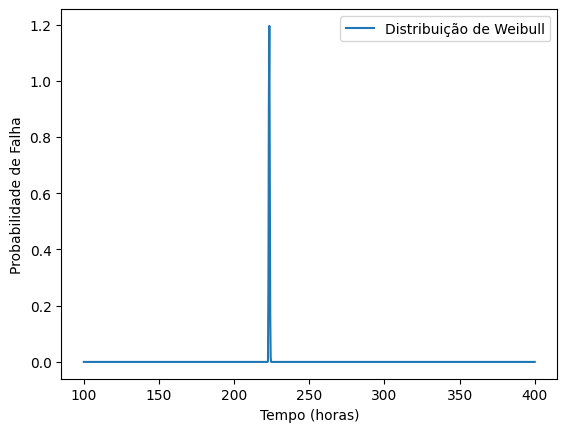

In [11]:
# Definindo o intervalo de tempo
tempo = np.linspace(100, 400, 1000)

# Calculando a probabilidade de falha
probabilidade_falha = weibull_min.pdf(tempo, m, b)

# Plotando a curva
plt.plot(tempo, probabilidade_falha, label="Distribuição de Weibull")
plt.xlabel("Tempo (horas)")
plt.ylabel("Probabilidade de Falha")
plt.legend()
plt.show()


Inclinação (m): 1.0
Vida característica (b): 1.0
Vida confiável para r = 90%: 2.302585092994046
Vida confiável para r = 10%: 0.10536051565782628


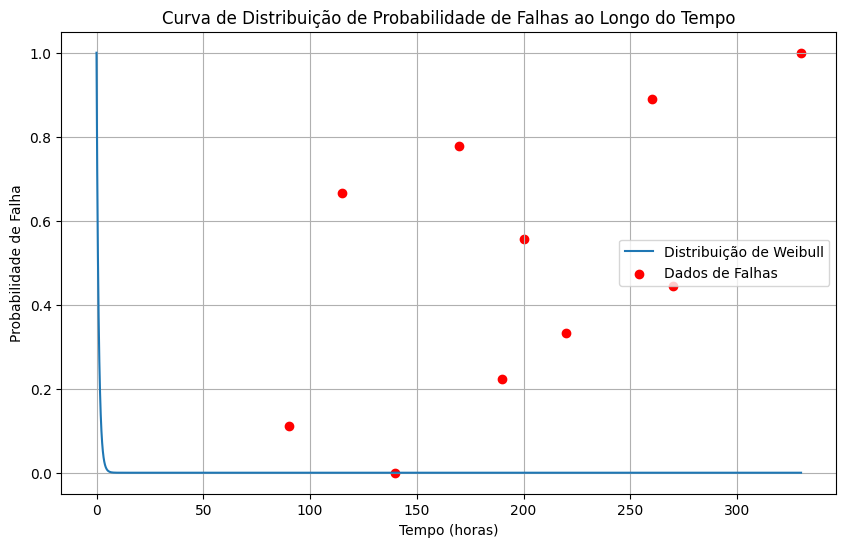

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min
from scipy.optimize import curve_fit

# Dados das falhas
tempo_falhas = np.array([140, 90, 190, 220, 270, 200, 115, 170, 260, 330])

# 1. Determinar a inclinação (m) e a vida característica (b) da distribuição de Weibull
def weibull_func(tempo, m, b):
    return 1 - np.exp(-((tempo / b) ** m))

params, _ = curve_fit(weibull_func, tempo_falhas, np.linspace(0, 1, len(tempo_falhas)))

m, b = params

# 2. Determinar a vida confiável para r = 90% e r = 10%
r_90 = 0.90
r_10 = 0.10

vida_confiavel_90 = b * (-np.log(1 - r_90)) ** (1 / m)
vida_confiavel_10 = b * (-np.log(1 - r_10)) ** (1 / m)

print("Inclinação (m):", m)
print("Vida característica (b):", b)
print("Vida confiável para r = 90%:", vida_confiavel_90)
print("Vida confiável para r = 10%:", vida_confiavel_10)

# 3. Produzir a curva de distribuição de probabilidades de falhas ao longo do tempo
x = np.linspace(0, tempo_falhas.max(), 1000)
pdf = weibull_min.pdf(x, m, scale=b)

plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label='Distribuição de Weibull')
plt.scatter(tempo_falhas, np.linspace(0, 1, len(tempo_falhas)), color='red', label='Dados de Falhas')
plt.xlabel('Tempo (horas)')
plt.ylabel('Probabilidade de Falha')
plt.title('Curva de Distribuição de Probabilidade de Falhas ao Longo do Tempo')
plt.legend()
plt.grid(True)
plt.show()


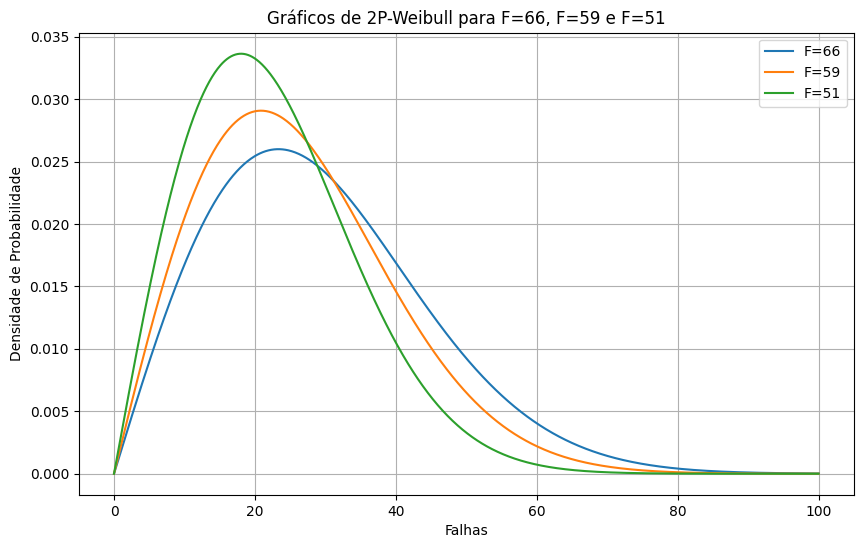

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Parâmetros da distribuição de Weibull para F=66, F=59 e F=51
c = 2  # Parâmetro de forma comum a todas as distribuições
f_A = 66
f_B = 59
f_C = 51

# Gerar valores para x
x = np.linspace(0, 100, 1000)

# Calcular a função de densidade de probabilidade (PDF) para cada valor de F
pdf_A = weibull_min.pdf(x, c, scale=f_A/c)
pdf_B = weibull_min.pdf(x, c, scale=f_B/c)
pdf_C = weibull_min.pdf(x, c, scale=f_C/c)

# Plotar os gráficos
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_A, label='F=66')
plt.plot(x, pdf_B, label='F=59')
plt.plot(x, pdf_C, label='F=51')
plt.xlabel('Falhas')
plt.ylabel('Densidade de Probabilidade')
plt.title('Gráficos de 2P-Weibull para F=66, F=59 e F=51')
plt.legend()
plt.grid(True)
plt.show()


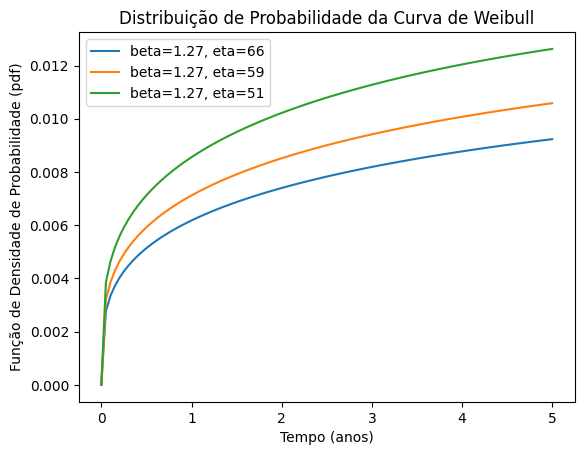

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Valores de forma (beta) e escala (eta) da distribuição de Weibull
beta_values = [1.27]  # Valores de forma
eta_values =  [66, 59, 51]  # Valores de escala

# Tempo (em anos)
time = np.linspace(0, 5, 100)

# Plotar os gráficos da distribuição de probabilidade da curva de Weibull para cada combinação de beta e eta
for beta in beta_values:
    for eta in eta_values:
        # Calcula a função de densidade de probabilidade (pdf) da distribuição de Weibull
        pdf = weibull_min.pdf(time, beta, scale=eta)

        # Plotar a função de densidade de probabilidade
        plt.plot(time, pdf, label=f'beta={beta}, eta={eta}')

# Adicionar rótulos e título ao gráfico
plt.xlabel('Tempo (anos)')
plt.ylabel('Função de Densidade de Probabilidade (pdf)')
plt.title('Distribuição de Probabilidade da Curva de Weibull')
plt.legend()
plt.show()
